# NetworkX tutorial

## Creating a graph

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

### Nodes

In [3]:
# add single node
G.add_node(1) 

# add nodes from list
G.add_nodes_from([2,3])

# uses an attribute dict
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"})
]) 

# add nodes from a seperate graph
H = nx.path_graph(10)
G.add_nodes_from(H)

# uses entire H graph as single node in G
G.add_node(H)

### Edges

In [4]:
# add single edge
G.add_edge(1, 2) # edge from 1 to 2
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# list of edges
G.add_edges_from([(1, 2), (1, 3)])

# edges from seperae graph
G.add_edges_from(H.edges)

### Nodes and edges

In [6]:
#remove alle existing nodes and edges
G.clear() 

# nodes that already exist are ignored without warning
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

# get info about nodes and edges
display(G.number_of_nodes())
display(G.number_of_edges())

8

3

## Examining elements of graph

In [9]:
print("nodes = ", list(G.nodes)) # get nodes as list
print("edges = ", list(G.edges)) # get edges as list
print("adjacency list = ", list(G.adj[1]))  # or list(G.neighbors(1))
print("degree = ", G.degree[1])  # the number of edges incident to 1

# look at subset
print("edges of 2 and m = ", G.edges([2, 'm']))
print("degree of 2 and 3 = ", G.degree([2, 3]))

nodes =  [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
edges =  [(1, 2), (1, 3), (3, 'm')]
adjacency list =  [2, 3]
degree =  2
edges of 2 and m =  [(2, 1), ('m', 3)]
degree of 2 and 3 =  [(2, 1), (3, 2)]


## Remove elements

In [11]:
# remove single node
G.remove_node(2)

# remove multiple nodes
G.remove_nodes_from("spam")
list(G.nodes)

# remove edge
G.remove_edge(1, 3)

## Graph constructor

In [14]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print("edges of H = ", list(H.edges()))
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

edges of H =  [(1, 2), (2, 1)]


## Accessing edges and neighbors

Kan indexere for at få fat i en node/edge

In [15]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
display(G[1])  # same as G.adj[1]
display(G[1][2])
display(G.edges[1, 2])

AtlasView({2: {'color': 'yellow'}})

{'color': 'yellow'}

{'color': 'yellow'}

In [16]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

### Iterables and weighted edges

Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items(). Note that for undirected graphs, adjacency iteration sees each edge twice.

In [17]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [18]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


## Adding attributes to graphs, nodes and edges
Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges. <br>
Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.nodes, and G.edges for a graph G.

### Graph attributes

In [19]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [20]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Node attributes
Add node attributes using add_node(), add_nodes_from(), or G.nodes

In [21]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print("attribute of node 1 = ", G.nodes[1])
G.nodes[1]['room'] = 714
print("data about nodes: \n",G.nodes.data())

attribute of node 1 =  {'time': '5pm'}
data about nodes: 
 [(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


### Edge attributes
Add/change edge attributes using add_edge(), add_edges_from(), or subscript notation.
<br>The special attribute weight should be numeric as it is used by algorithms requiring weighted edges.

In [22]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

## Directed graphs
The DiGraph class provides additional methods and properties specific to directed edges, e.g., DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() is equivalent to successors() while degree reports the sum of in_degree and out_degree even though that may feel inconsistent at times.

In [24]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print("out-degree of node 1 = ", DG.out_degree(1, weight='weight'))
print("total degree of node 1 = ", DG.degree(1, weight='weight'))
print("successors of node 1 = ", list(DG.successors(1)))
print("neighbors of node 1 = ", list(DG.neighbors(1)))

out-degree of node 1 =  0.5
total degree of node 1 =  1.25
successors of node 1 =  [2]
neighbors of node 1 =  [2]


Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using Graph.to_undirected() or with

In [25]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

## Multigraph
NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., MultiGraph.degree() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [26]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print("dictionary of degrees in MG = ", dict(MG.degree(weight='weight')))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

print("shortest path from 1 to 3 = ", nx.shortest_path(GG, 1, 3))

dictionary of degrees in MG =  {1: 1.25, 2: 1.75, 3: 0.5}
shortest path from 1 to 3 =  [1, 2, 3]


## Graph generators and operations

In [27]:
# classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [28]:
# stochastic graph generator
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

### Reading and writing to a file
Reading a graph stored in a file using common graph formats, such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [ ]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

## Analysing graphs

In [30]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
print("connected components of G  = ",list(nx.connected_components(G)))
print("degrees in sorted order = ", sorted(d for n, d in G.degree()))
print("clustering of G  =",nx.clustering(G))

sp = dict(nx.all_pairs_shortest_path(G))
print("dict of shortest path of 3 = ", sp[3])

connected components of G  =  [{1, 2, 3}, {'spam'}]
degrees in sorted order =  [0, 1, 1, 2]
clustering of G  = {1: 0, 2: 0, 3: 0, 'spam': 0}
dict of shortest path of 3 =  {3: [3], 1: [3, 1], 2: [3, 1, 2]}


## Drawing graphs
NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing module and will be imported if possible.

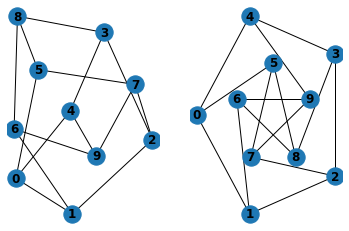

In [31]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

### Set options
You can find additional options via draw_networkx() and layouts via layout. You can use multiple shells with draw_shell().

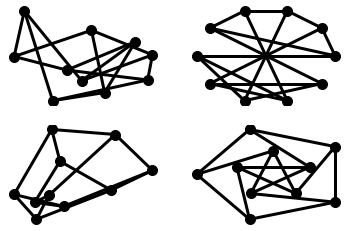

In [32]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

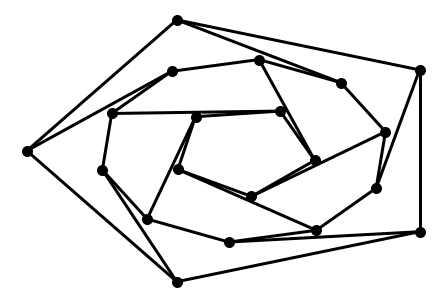

In [33]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

In [36]:
# !pip install pygraphviz
# from networkx.drawing.nx_pydot import write_dot
# pos = nx.nx_agraph.graphviz_layout(G)
# nx.draw(G, pos=pos)
# write_dot(G, 'file.dot')